In [2]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.10/ (Recommended version – 3.10).
# The Python Tutorial (python3.10): https://docs.python.org/3.10//tutorial/index.html

# Load Modules ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
#       About: https://matplotlib.org/
#       Using Matplotlib (user guide): https://matplotlib.org/stable/users/index
#       Plot types: https://matplotlib.org/stable/plot_types/index
#       Tutorials: https://matplotlib.org/stable/tutorials/index
#       Examples: https://matplotlib.org/stable/gallery/index
#       API Reference: https://matplotlib.org/stable/api/index

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.26.4
pandas version:  2.2.2
seaborn version: 0.13.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# Data analysis on [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The **data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)**. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. Fisher's paper was published in the Annals of Eugenics (today the Annals of Human Genetics) and includes discussion of the contained techniques' applications to the field of phrenology

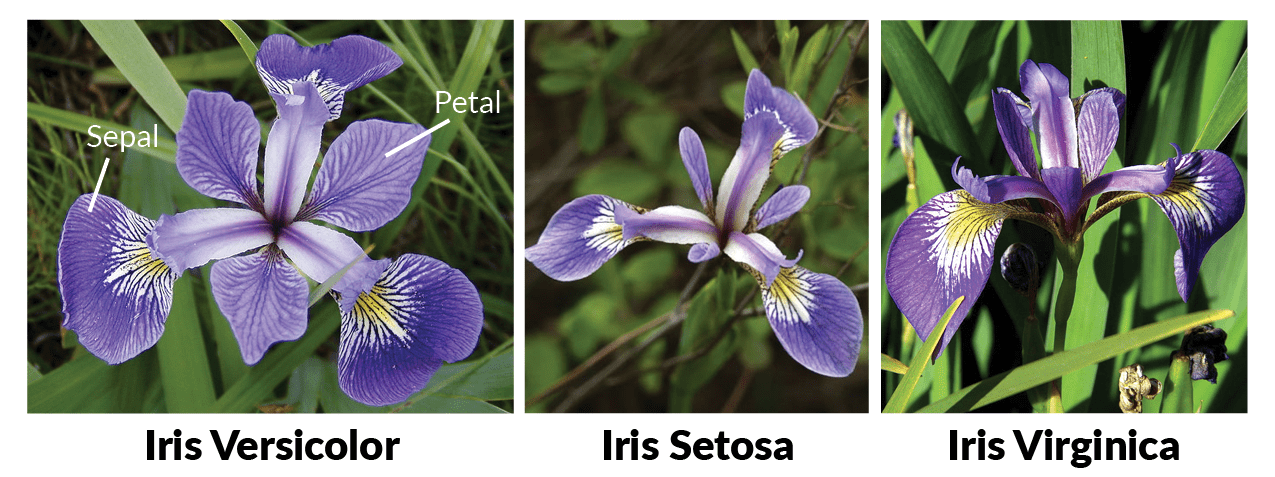

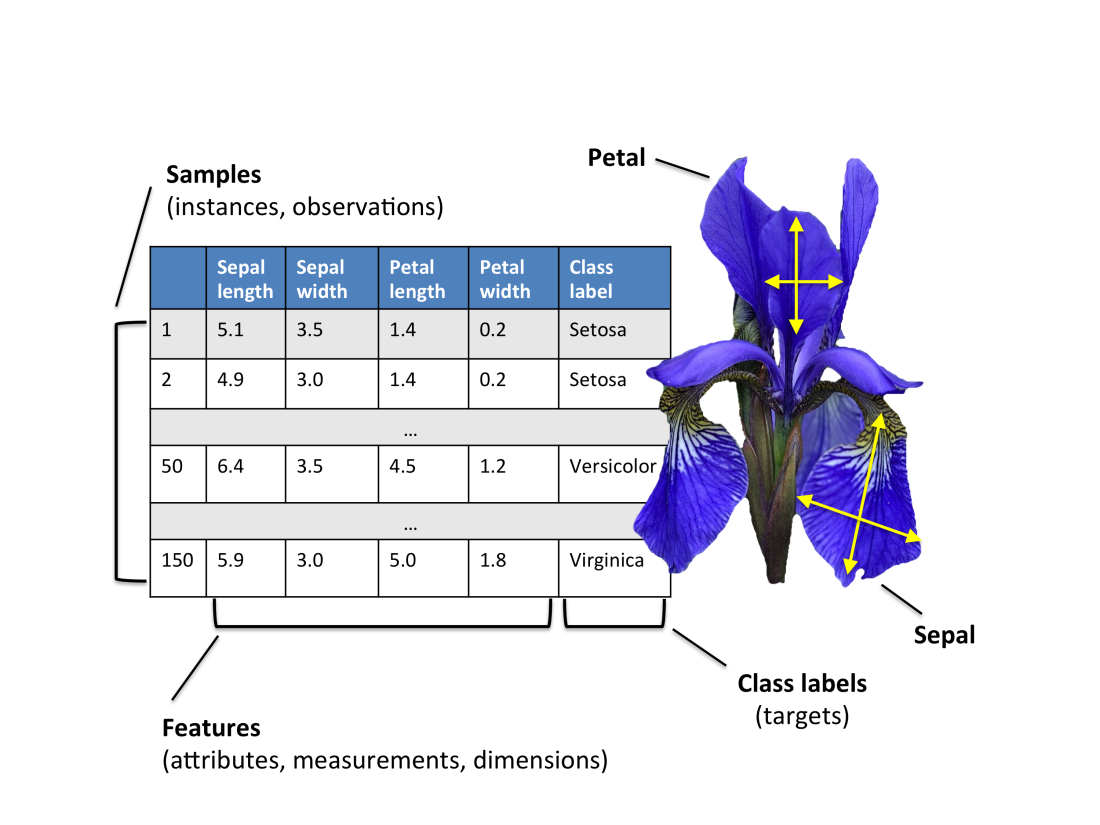

### download dataset

source: https://en.wikipedia.org/wiki/Iris_flower_data_set

#### download data using [shell commands](https://manpages.ubuntu.com/manpages/trusty/en/man1/sh.1posix.html)

bash shell : https://en.wikipedia.org/wiki/Bash_(Unix_shell)

In [3]:
%%bash
wget -qq "https://archive.ics.uci.edu/static/public/53/iris.zip"                # download dataset
unzip -qq "iris.zip"                                                            # unzip dataset

#### download using python and [wget module](https://pypi.org/project/wget/)

In [4]:
#!python -m pip install -qq wget                                                 # install wget module
#!python -m wget "https://archive.ics.uci.edu/static/public/53/iris.zip"         # download data using python's wget module
# zipfile — Work with ZIP archives : source: https://docs.python.org/3/library/zipfile.html
#!python -m zipfile -e "iris.zip" "/content"                                     # source: https://docs.python.org/3/library/zipfile.html#command-line-interface

#### download using [ucimlrepo package](https://github.com/uci-ml-repo/ucimlrepo)

In [5]:
# install the ucimlrepo package
#!python -m pip install -qq ucimlrepo

In [6]:
# from ucimlrepo import fetch_ucirepo                                             # load `fetch_ucirepo` function

# iris=fetch_ucirepo(id=53)                                                       # fetch iris dataset
# X,y=iris.data.features,iris.data.targets                                        # load data (as pandas dataframes)
# print('Info:\n',iris.metadata)                                                  # make print metadata
# print('Variables:',iris.variables)                                              # variable information

### load data as [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [7]:
iris_df=pd.read_csv('iris.data',header=None,names=['sepal length in cm','sepal width in cm',# set column names
                           'petal length in cm','petal width in cm','class name'])# load data file (text / csv file)
# header : Row number(s) to use as the column names, and the start of the data. default - 'infer' (first row)
iris_df.head()                                                                  # head of data (first five rows)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_df.tail()                                                                  # tail of data (last five rows)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
iris_df.shape                                                                   # shape of data (rows, columns)

(150, 5)

In [10]:
iris_df.size                                                                    # size of data

750

In [11]:
iris_df.index                                                                   # indexs in data

RangeIndex(start=0, stop=150, step=1)

In [12]:
iris_df.columns                                                                 # column names

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class name'],
      dtype='object')

In [13]:
iris_df.info()                                                                  # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### see stats of data

In [14]:
iris_df.describe()                                                              # see stats of numerical columns

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_df.describe(include='object')                                              # stats for object type

,class name
count,150
unique,3
top,Iris-setosa
freq,50


### search for missisng values

In [16]:
#iris_df.isna()                                                                 # return bool dataframe
# Detect missing values.
# Return a boolean same-sized object indicating if the values are NA.
# NA values, such as None or numpy.NaN, gets mapped to True
# values. Everything else gets mapped to False values. Characters such
# as empty strings '' or numpy.inf are not considered NA values
# (unless you set pandas.options.mode.use_inf_as_na = True).
iris_df.isna().sum()                                                            # column-wise sum
# False -> 0 and True -> 1 , So, counts represent total numerical (or None) values

,0
sepal length in cm,0
sepal width in cm,0
petal length in cm,0
petal width in cm,0
class name,0


In [17]:
# check for non-numerical null values
iris_df['class name'].unique()                                                  # get all unique values in column
# as there is no null value in unique column value thus there is no null value in column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
iris_df['class name'].value_counts()                                            # each type of value counts

,count
class name,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### search for feature importance by plots (graphical method)

#### [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

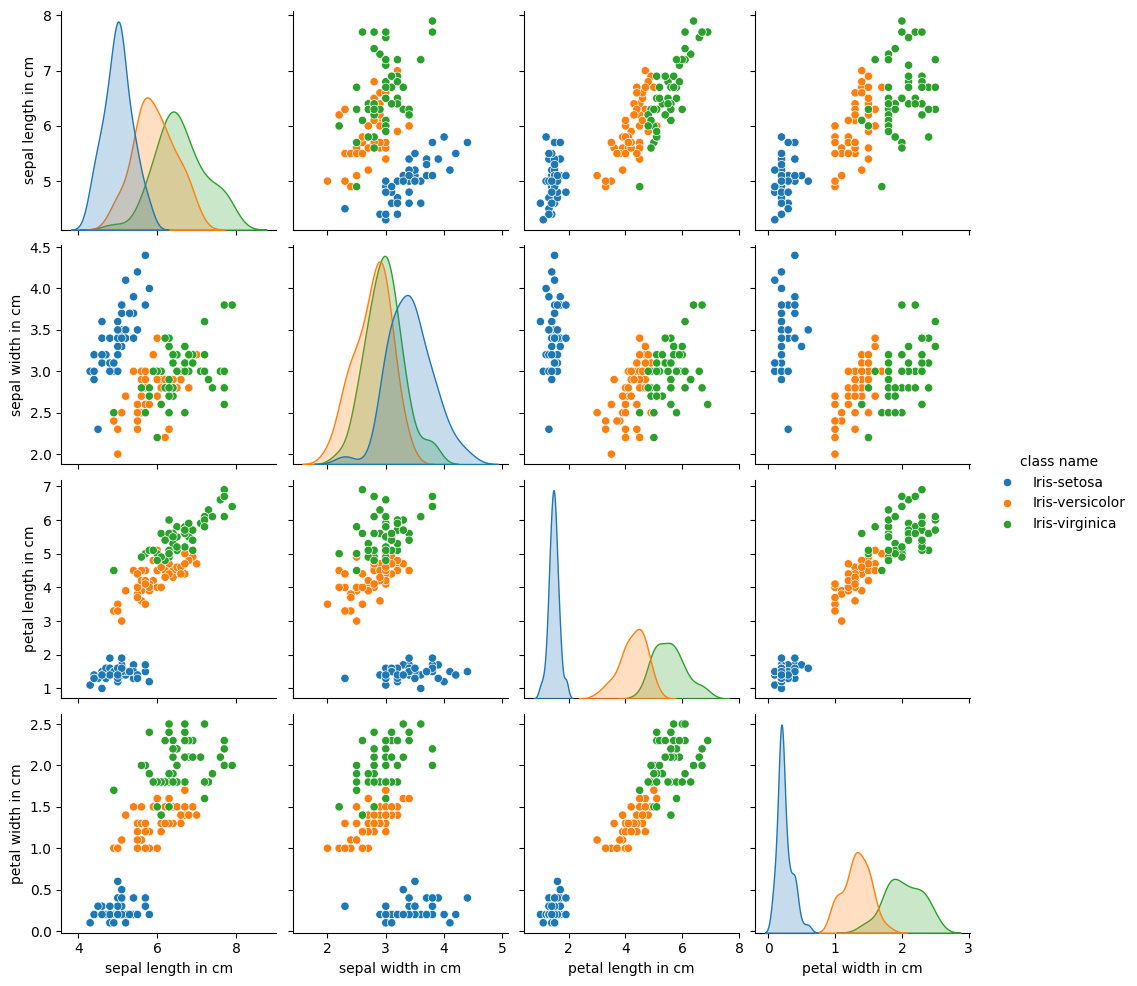

In [19]:
# kind -> {'scatter', 'kde', 'hist', 'reg'}
sns.pairplot(data=iris_df,hue='class name',kind='scatter')
# Set color -> palette=sns.color_palette("cubehelix")[:3] # three color palettle
#  or can be custom -> palette=[(0,0,1),(0,1,0),(1,0,0)]
# source: https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()                                                                      # make show plot

#### [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)

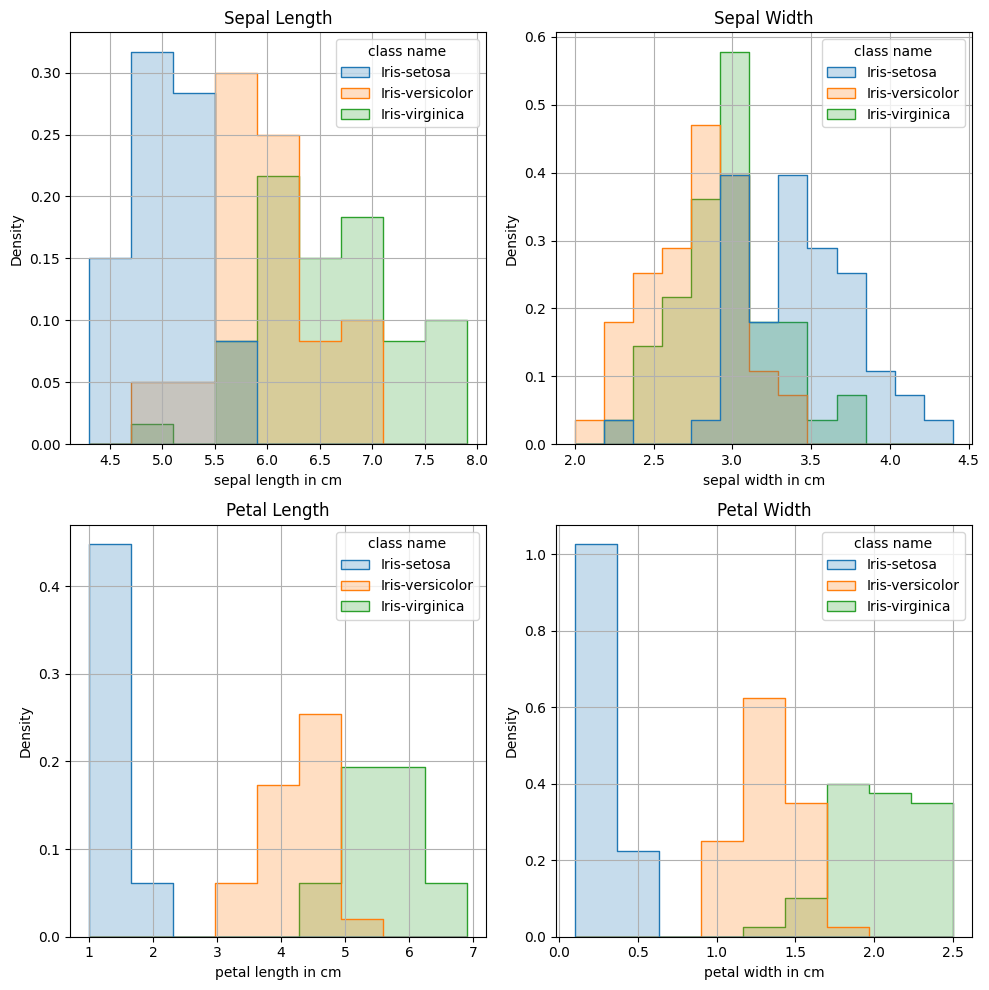

In [20]:
plt.figure(figsize=(10,10))                                                     # make figure to control figure size
plt.subplot(2,2,1)                                                              # make plot "sepal length" column at plot 1
sns.histplot(data=iris_df,x='sepal length in cm',y=None,hue='class name',bins='auto',stat='density',element='step')# make plot histogram
# Aggregate statistic to compute in each bin.
#     count: show the number of observations in each bin
#     frequency: show the number of observations divided by the bin width
#     probability or proportion: normalize such that bar heights sum to 1
#     percent: normalize such that bar heights sum to 100
#     density: normalize such that the total area of the histogram equals 1
# element : {"bars", "step", "poly"}
plt.grid(),plt.title('Sepal Length')                                            # add grid and title

plt.subplot(2,2,2)                                                              # make plot "sepal width" column at plot 2
sns.histplot(data=iris_df,x='sepal width in cm',y=None,hue='class name',bins='auto',stat='density',element='step')# make plot histogram
plt.grid(),plt.title('Sepal Width')                                             # add grid and title

plt.subplot(2,2,3)                                                              # make plot "petal length" column at plot 3
sns.histplot(data=iris_df,x='petal length in cm',y=None,hue='class name',bins='auto',stat='density',element='step')# make plot histogram
plt.grid(),plt.title('Petal Length')                                            # add grid and title

plt.subplot(2,2,4)                                                              # make plot "petal width" column at plot 4
sns.histplot(data=iris_df,x='petal width in cm',y=None,hue='class name',bins='auto',stat='density',element='step')# make plot histogram
plt.grid(),plt.title('Petal Width')                                             # add grid and title

plt.tight_layout()                                                              # make tight layout
plt.show()                                                                      # make show plot

#### [Box and Whisker plot](https://en.wikipedia.org/wiki/Box_plot)

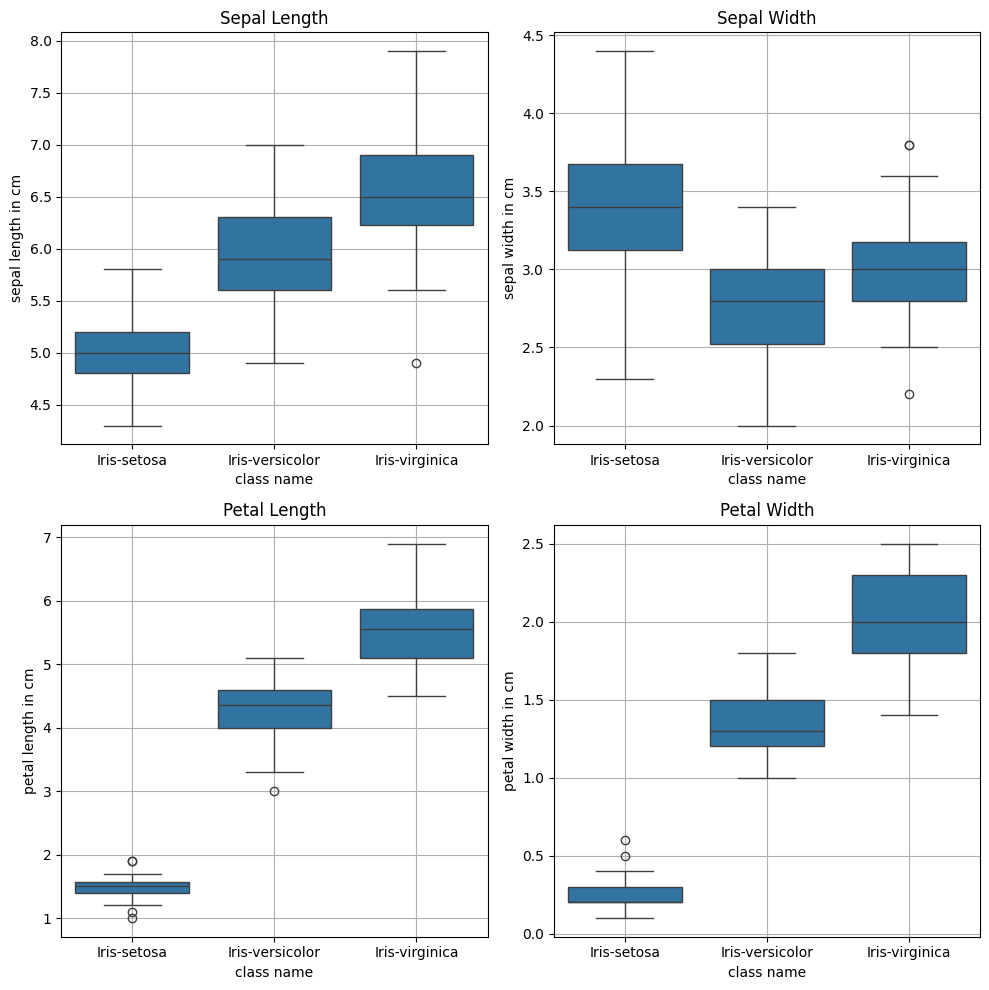

In [21]:
# https://en.wikipedia.org/wiki/Box_plot
plt.figure(figsize=(10,10))                                                     # make figure to control figure size
plt.subplot(2,2,1)                                                              # make plot "sepal length" column at plot 1
sns.boxplot(data=iris_df,y='sepal length in cm',x='class name')                 # make plot box and whisker plot
plt.grid(),plt.title('Sepal Length')                                            # add grid and title

plt.subplot(2,2,2)                                                              # make plot "sepal width" column at plot 2
sns.boxplot(data=iris_df,y='sepal width in cm',x='class name')                  # make plot box and whisker plot
plt.grid(),plt.title('Sepal Width')                                             # add grid and title

plt.subplot(2,2,3)                                                              # make plot "petal length" column at plot 3
sns.boxplot(data=iris_df,y='petal length in cm',x='class name')                  # make plot box and whisker plot
plt.grid(),plt.title('Petal Length')                                             # add grid and title

plt.subplot(2,2,4)                                                              # make plot "petal width" column at plot 4
sns.boxplot(data=iris_df,y='petal width in cm',x='class name')                  # make plot box and whisker plot
plt.grid(),plt.title('Petal Width')                                             # add grid and title

plt.tight_layout()                                                              # make tight layout
plt.show()                                                                      # make show plot

#### [Violin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

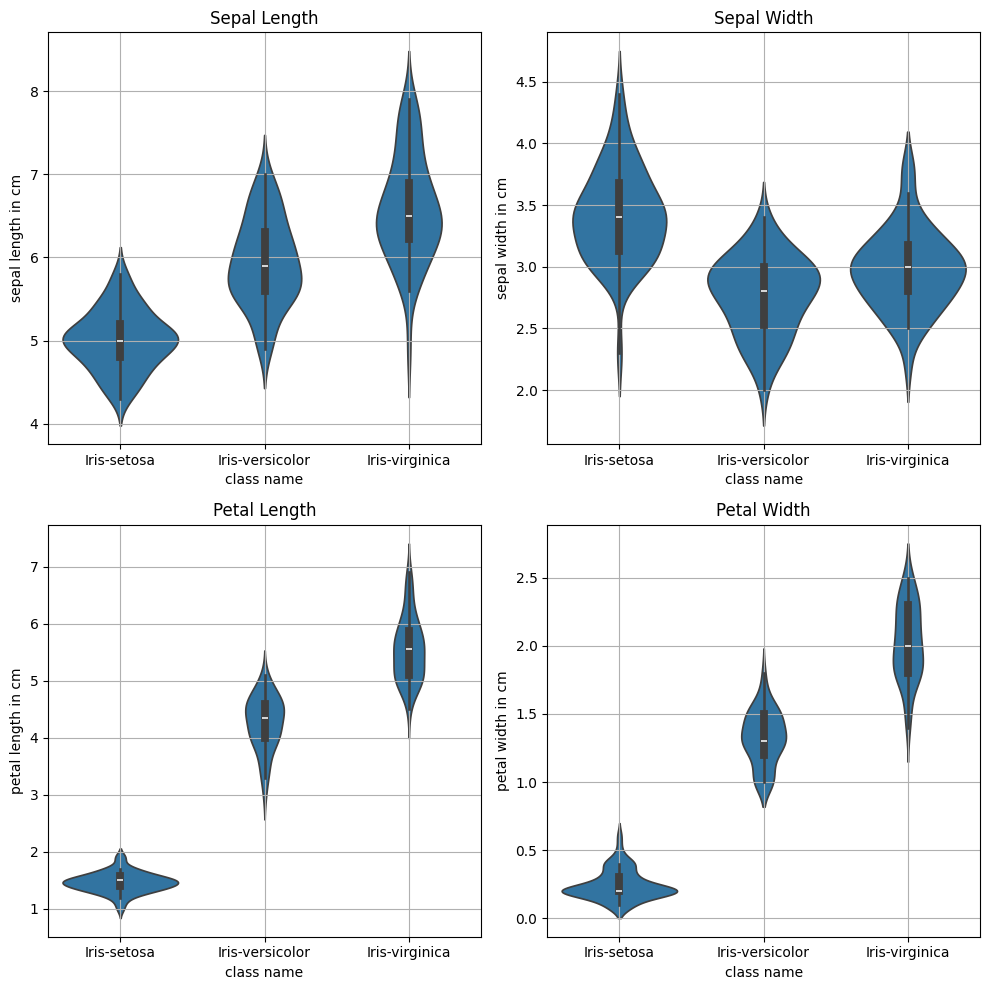

In [22]:
plt.figure(figsize=(10,10))                                                     # make figure to control figure size
plt.subplot(2,2,1)                                                              # make plot "sepal length" column at plot 1
sns.violinplot(data=iris_df,y='sepal length in cm',x='class name')              # make plot box and whisker plot
plt.grid(),plt.title('Sepal Length')                                            # add grid and title

plt.subplot(2,2,2)                                                              # make plot "sepal width" column at plot 2
sns.violinplot(data=iris_df,y='sepal width in cm',x='class name')               # make plot box and whisker plot
plt.grid(),plt.title('Sepal Width')                                             # add grid and title

plt.subplot(2,2,3)                                                              # make plot "petal length" column at plot 3
sns.violinplot(data=iris_df,y='petal length in cm',x='class name')              # make plot box and whisker plot
plt.grid(),plt.title('Petal Length')                                            # add grid and title

plt.subplot(2,2,4)                                                              # make plot "petal width" column at plot 4
sns.violinplot(data=iris_df,y='petal width in cm',x='class name')               # make plot box and whisker plot
plt.grid(),plt.title('Petal Width')                                             # add grid and title

plt.tight_layout()                                                              # make tight layout
plt.show()                                                                      # make show plot

#### [Strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

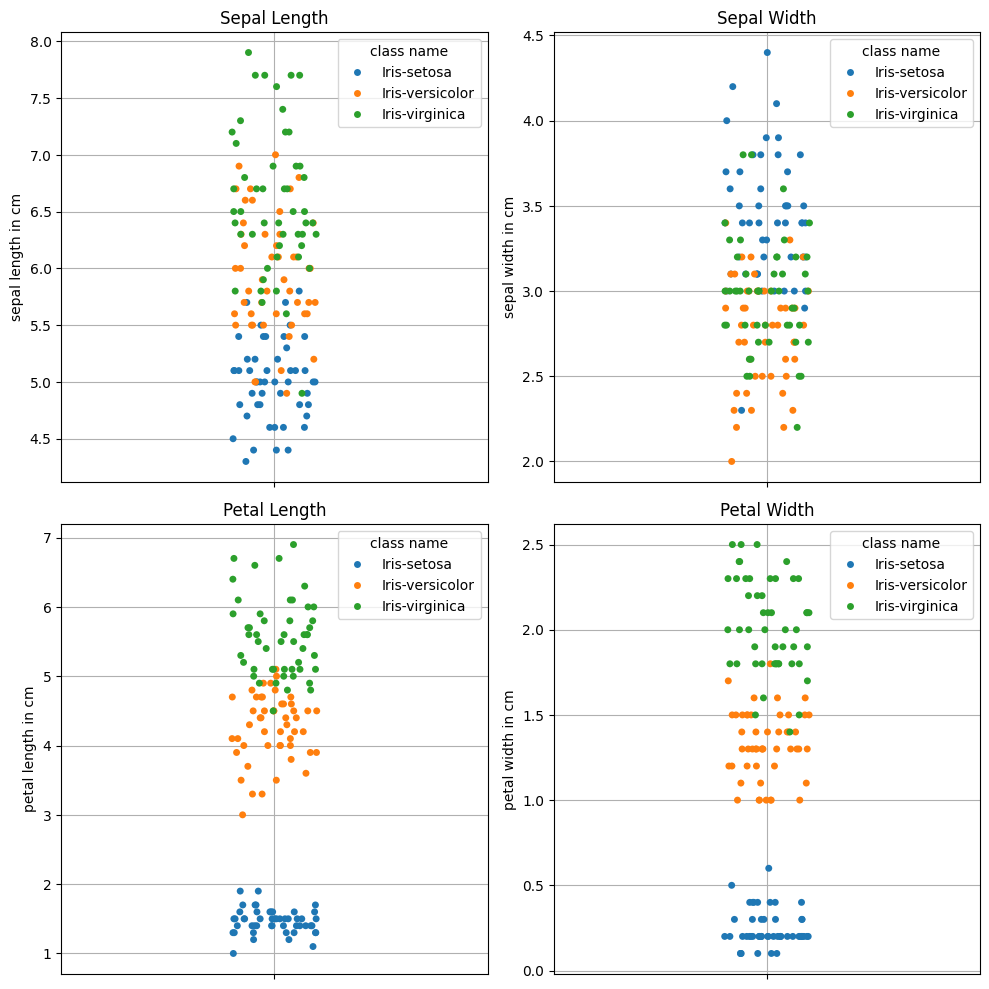

In [23]:
plt.figure(figsize=(10,10))                                                     # make figure to control figure size
plt.subplot(2,2,1)                                                              # make plot "sepal length" column at plot 1
sns.stripplot(data=iris_df,y='sepal length in cm',hue='class name')             # make plot box and whisker plot
plt.grid(),plt.title('Sepal Length')                                            # add grid and title

plt.subplot(2,2,2)                                                              # make plot "sepal width" column at plot 2
sns.stripplot(data=iris_df,y='sepal width in cm',hue='class name')              # make plot box and whisker plot
plt.grid(),plt.title('Sepal Width')                                             # add grid and title

plt.subplot(2,2,3)                                                              # make plot "petal length" column at plot 3
sns.stripplot(data=iris_df,y='petal length in cm',hue='class name')             # make plot box and whisker plot
plt.grid(),plt.title('Petal Length')                                            # add grid and title

plt.subplot(2,2,4)                                                              # make plot "petal width" column at plot 4
sns.stripplot(data=iris_df,y='petal width in cm',hue='class name')              # make plot box and whisker plot
plt.grid(),plt.title('Petal Width')                                             # add grid and title

plt.tight_layout()                                                              # make tight layout
plt.show()                                                                      # make show plot

#### [Joint Plot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

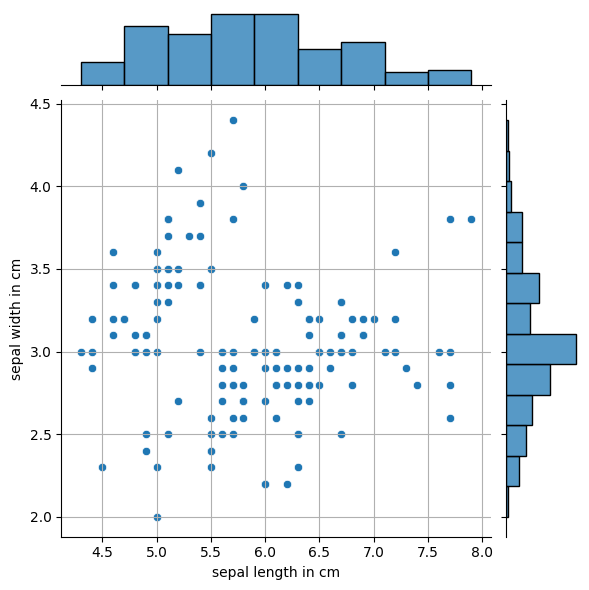

In [37]:
sns.jointplot(data=iris_df,x='sepal length in cm',y='sepal width in cm')        # make plot joint
plt.grid()                                                                      # add grid to plot
plt.show()                                                                      # make show plot

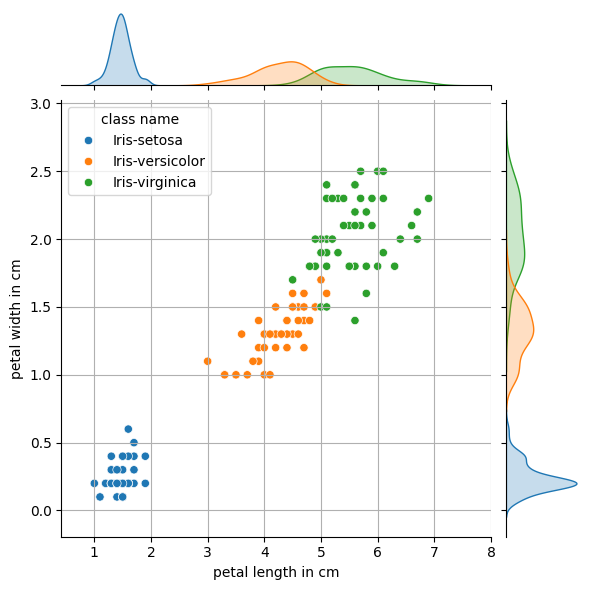

In [43]:
sns.jointplot(data=iris_df,x='petal length in cm',y='petal width in cm',hue='class name')# make plot joint - class wise
plt.grid()                                                                      # add grid to plot
plt.show()                                                                      # make show plot

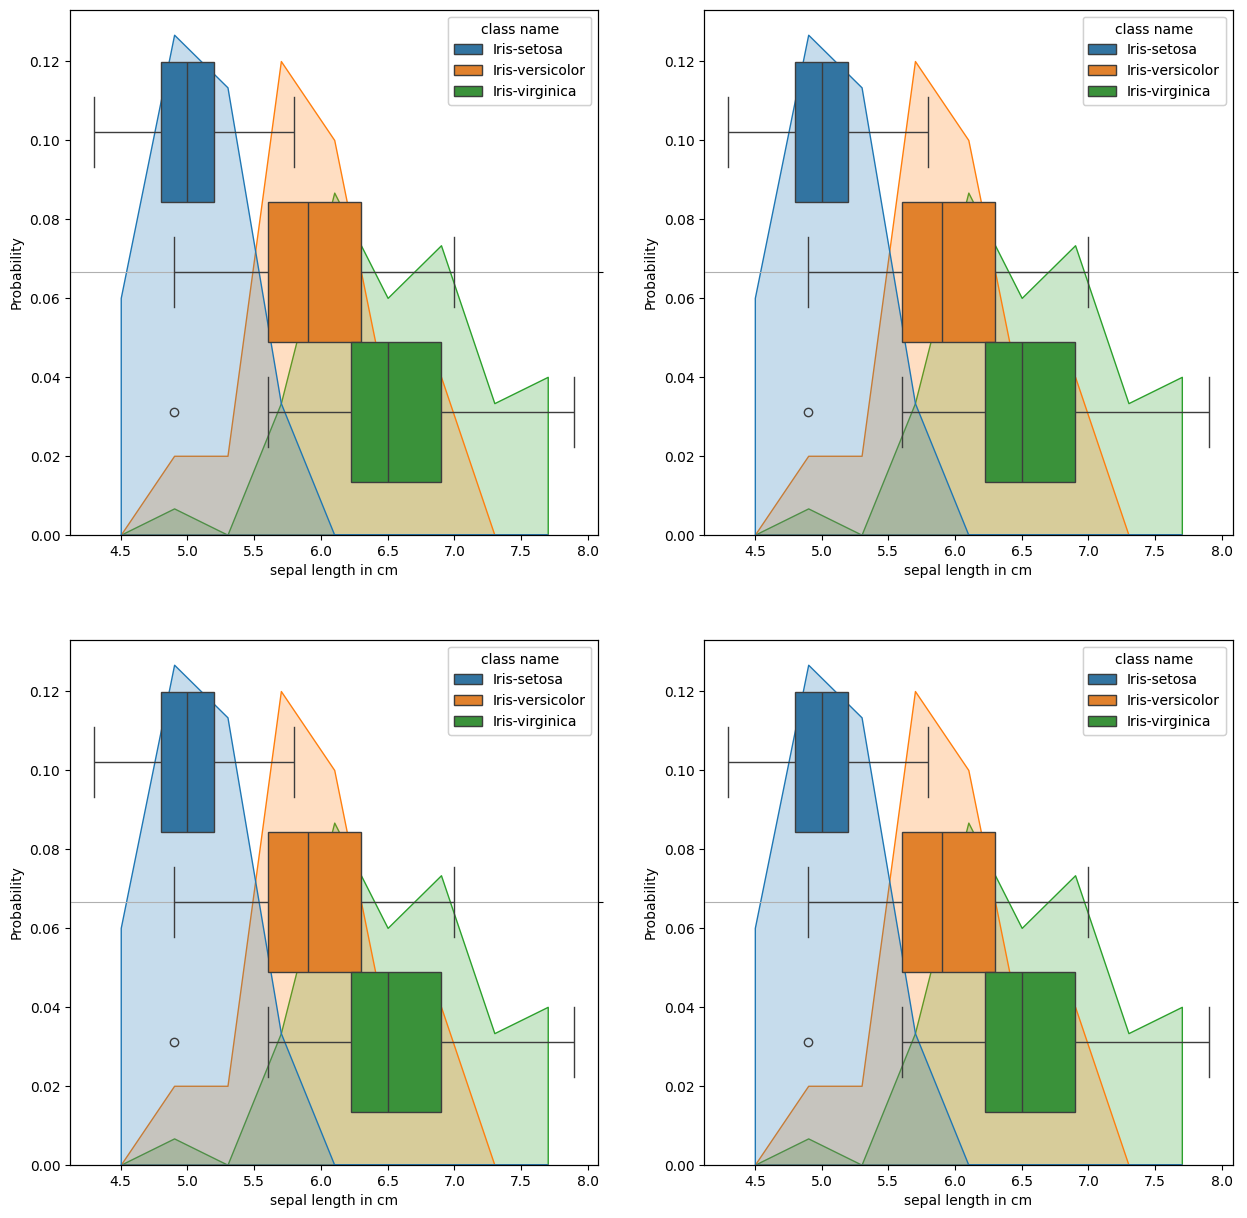

In [54]:
plt.figure(figsize=(15,15))                                                     # make set figure size
for index in range(iris_df.shape[1]-1):                                         # get index for sub plot
  plt.subplot(2,2,index+1)                                                      # make subplot
  sns.histplot(data=iris_df,x='sepal length in cm',hue='class name',kde=False,element='poly',stat='probability')# make plot histogram
  sns.boxplot(data=iris_df,x='sepal length in cm',hue='class name',ax=plt.twinx())# make box plot
  plt.grid()                                                                      # add grid
plt.show()                                                                      # show plot

### [3D plots](https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html)

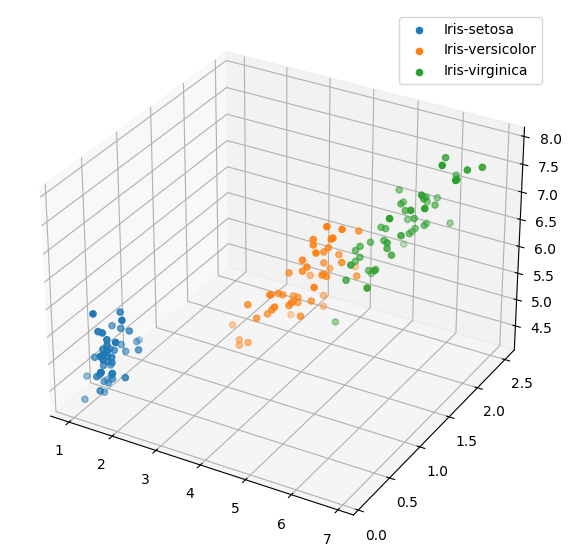

In [55]:
figure=plt.figure(figsize=(7,7))                                                # make figure of 7 by 7 inches
axis3d=figure.add_subplot(projection='3d')                                      # make axis 3D
for class_name in iris_df['class name'].unique():                               # get each class name
  iris_df_classwise=iris_df[iris_df['class name']==class_name]                  # get data for current class
  axis3d.scatter(iris_df_classwise['petal length in cm'],iris_df_classwise['petal width in cm'],iris_df_classwise['sepal length in cm'],# make scatter plot
                 label=class_name)                                              # make 3D plot for n-th class
plt.legend()                                                                    # add legend for class name
plt.show()                                                                      # make show plot

# References

* [The Python Tutorial](https://docs.python.org/3.10/tutorial/index.html)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
* [10 Minutes to Pandas (Pandas, official tutorial)](https://pandas.pydata.org/docs/user_guide/10min.html)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)